In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_valid = X_train_full[:-5000] / 255, X_train_full[-5000:] / 255
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
shape = X_train_full.shape
shape

(60000, 28, 28)

In [5]:
size = int(shape[0])
list_of_sizes = [10_000, 10_000, 10_000, 10_000, 10_000, 10_000]
list_of_X_train = [X_train_full[:10_000], X_train_full[10_000:20_000], X_train_full[20_000:30_000], X_train_full[30_000:40_000], 
                   X_train_full[40_000:50_000], X_train_full[50_000:60_000]]

In [6]:
X_train_1 = np.zeros((10_000, 28, 28, 3))
all_list = []
for i in range(len(list_of_sizes)):
    for a in range(list_of_sizes[i]):
        X_train_1[a] = np.repeat(list_of_X_train[i][a][..., np.newaxis], 3, -1)
    all_list.append(X_train_1)

In [7]:
X_train_rgb = np.append(all_list[0], all_list[1], axis=0)

In [8]:
X_train_rgb_1 = np.append(all_list[2], all_list[3], axis=0)

In [9]:
X_train_rgb_2 = np.append(all_list[4], all_list[5], axis=0)

In [10]:
X_train_rgb_a = np.append(X_train_rgb, X_train_rgb_1, axis=0)

In [11]:
X_train_rgb_all = np.append(X_train_rgb_a, X_train_rgb_2, axis=0)

In [12]:
X_train_rgb_all.shape

(60000, 28, 28, 3)

In [19]:
X_train_rgb_2.shape

(20000, 28, 28, 3)

In [15]:
X_train, X_valid = X_train_rgb_all[:-5000] / 255, X_train_rgb_all[-5000:] / 255
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [16]:
X_train.shape

(55000, 28, 28, 3)

In [19]:
IMG_HEIGHT, IMG_WIDTH, CHANNELS = 28, 28, 3

In [5]:
# X_train = X_train[..., np.newaxis]
# X_valid = X_valid[..., np.newaxis]
# X_test = X_test[..., np.newaxis]

In [18]:
X_train[0].shape

(28, 28, 3)

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    #keras.layers.Flatten(),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 161s 3ms/sample - loss: 2.2957 - accuracy: 0.1363 - val_loss: 2.0771 - val_accuracy: 0.7218
Epoch 2/3
55000/55000 [==============================] - 160s 3ms/sample - loss: 2.2874 - accuracy: 0.1536 - val_loss: 2.0609 - val_accuracy: 0.7718
Epoch 3/3
55000/55000 [==============================] - 160s 3ms/sample - loss: 2.2822 - accuracy: 0.1603 - val_loss: 1.9317 - val_accuracy: 0.8720


In [23]:
X_test_1 = np.zeros((10_000, 28, 28, 3))
for a in range(10_000):
    X_test_1[a] = np.repeat(X_test[a][..., np.newaxis], 3, -1)

In [24]:
X_test_1.shape

(10000, 28, 28, 3)

In [27]:
model.evaluate(X_test_1, y_test)

10000/10000 [==============================] - 5s 522us/sample - loss: 4.3711 - accuracy: 0.8842


[4.371125977418826, 0.8842]

In [28]:
model.save('my_convolution_model.h5')

In [ ]:

# Exercise: Use transfer learning for large image classification, going through these steps:

# Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).
# Split it into a training set, a validation set, and a test set.
# Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.
# Fine-tune a pretrained model on this dataset.
# See the Flowers example above.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

import tensorflow_datasets as tfds

In [10]:
dataset, info = tfds.load('malaria', as_supervised=True, with_info=True)
tfds.disable_progress_bar()

In [11]:
info.splits

{'train': <tfds.core.SplitInfo num_examples=27558>}

In [12]:
class_names = info.features['label'].names
class_names

['parasitized', 'uninfected']

In [13]:
n_classes = info.features['label'].num_classes
n_classes

2

In [14]:
dataset_size = info.splits['train'].num_examples
dataset_size

27558

In [15]:
test_set_raw, valid_test_raw, train_set_raw = tfds.load('malaria', split=['train[:10%]', 'train[10%:25%]', 'train[25%:]'],
                                                       as_supervised=True)

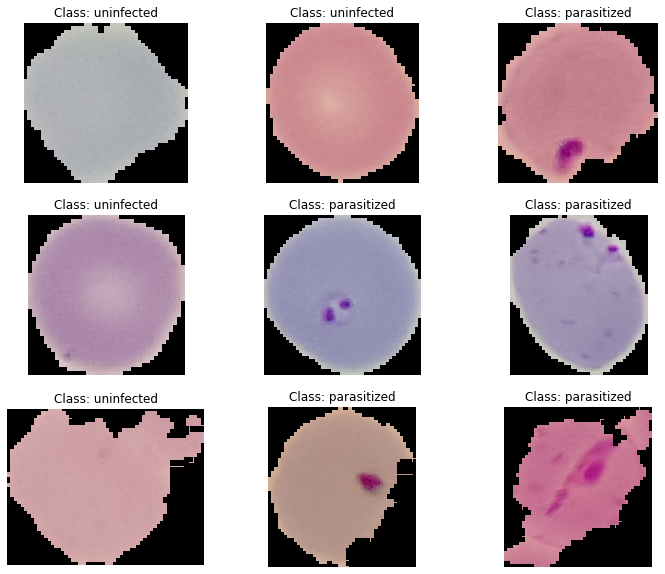

In [16]:
plt.figure(figsize=(12,10))
index=0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3,3, index)
    plt.imshow(image)
    plt.title('Class: {}'.format(class_names[label]))
    plt.axis('off')
plt.show()

In [17]:
IMAGE_MAX_PIXEL = 255

def preprocess(image, label):
    image = image/IMAGE_MAX_PIXEL
    resized_image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    
    return resized_image, label

In [20]:
train = train_set_raw.map(preprocess)
valid = valid_test_raw.map(preprocess)
test = test_set_raw.map(preprocess)

In [21]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
valid_batches = valid.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_batches = test.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [41]:
for image_batch, _ in train_batches.take(1):
    image_batch[0].shape
image_batch.shape

TensorShape([32, 28, 28, 3])

In [29]:
model_A = keras.models.load_model('my_convolution_model.h5')
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [41]:
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(100, activation="relu"))
model_B_on_A.add(keras.layers.Flatten())
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [42]:
model_B_on_A.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [43]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [44]:
model_B_on_A.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [45]:
history = model_B_on_A.fit(train_batches, epochs=10, validation_data=valid_batches)

Epoch 1/10
646/646 [==============================] - 28s 43ms/step - loss: 0.6929 - accuracy: 0.5117 - val_loss: 0.6926 - val_accuracy: 0.5162
Epoch 2/10
105/646 [===>..........................] - ETA: 21s - loss: 0.6921 - accuracy: 0.5286

KeyboardInterrupt: 

In [36]:
for layer in model_B_on_A.layers:
    layer.trainable = True

# optimizer = keras.optimizers.SGD(learning_rate=0.01, mom)
history_1 = model_B_on_A.fit(train_batches, epochs=20, validation_data=valid_batches)

Epoch 1/20
646/646 [==============================] - 28s 44ms/step - loss: 0.6914 - accuracy: 0.5401 - val_loss: 0.6911 - val_accuracy: 0.5658
Epoch 2/20
646/646 [==============================] - 24s 38ms/step - loss: 0.6916 - accuracy: 0.5335 - val_loss: 0.6910 - val_accuracy: 0.5660
Epoch 3/20
646/646 [==============================] - 25s 38ms/step - loss: 0.6913 - accuracy: 0.5328 - val_loss: 0.6908 - val_accuracy: 0.5709
Epoch 4/20
646/646 [==============================] - 24s 38ms/step - loss: 0.6911 - accuracy: 0.5351 - val_loss: 0.6907 - val_accuracy: 0.5716
Epoch 5/20
646/646 [==============================] - 25s 38ms/step - loss: 0.6908 - accuracy: 0.5453 - val_loss: 0.6905 - val_accuracy: 0.5740
Epoch 6/20
646/646 [==============================] - 25s 38ms/step - loss: 0.6905 - accuracy: 0.5460 - val_loss: 0.6904 - val_accuracy: 0.5745
Epoch 7/20
646/646 [==============================] - 25s 39ms/step - loss: 0.6906 - accuracy: 0.5386 - val_loss: 0.6902 - val_accuracy: